In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [4]:
data = pd.read_csv("./data/us_contagious_diseases.csv", index_col=0)
data.keys()

Index(['disease', 'state', 'year', 'weeks_reporting', 'count', 'population'], dtype='object')

In [6]:
measle = data[data["disease"] == "Measles"]
measle = measle[measle['state'] != "Alaska"]
measle = measle[measle['state'] != "Hawaii"]
measle["state"].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District Of Columbia', 'Florida',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [36]:
measle["rate"] = (measle["count"]/measle["population"]) * 100000 * (52 / measle["weeks_reporting"])


In [10]:
MeasleGroups = measle.groupby("state")
California = MeasleGroups.get_group("California")

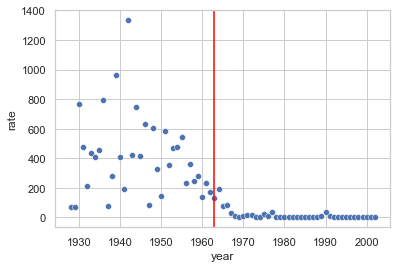

In [12]:
sns.set_theme(style="whitegrid")

sns.scatterplot(x="year", y="rate", data=California)
plt.axvline(1963, 0,1, color ='red')

<AxesSubplot:xlabel='year', ylabel='weeks_reporting'>

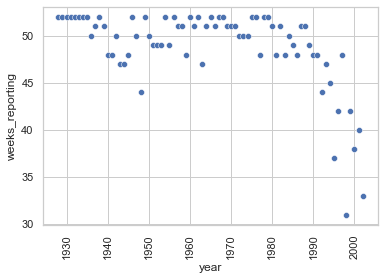

In [14]:
plt.xticks(rotation=90)
sns.scatterplot(x="year",y="weeks_reporting", data=California)

In [16]:
MeasleYearGroups = measle.groupby("year")
Measle50 = MeasleYearGroups.get_group(1950)
Measle60 = MeasleYearGroups.get_group(1960)
Measle70 = MeasleYearGroups.get_group(1970)

In [18]:
Measle50["rate_sqrt"] = Measle50["rate"].transform("sqrt")
Measle60["rate_sqrt"] = Measle60["rate"].transform("sqrt")
Measle70["rate_sqrt"] = Measle70["rate"].transform("sqrt")

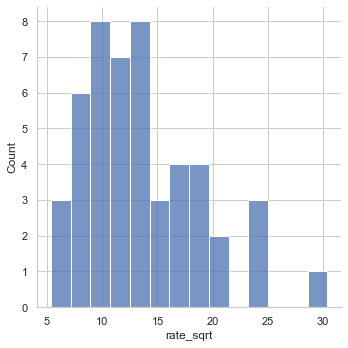

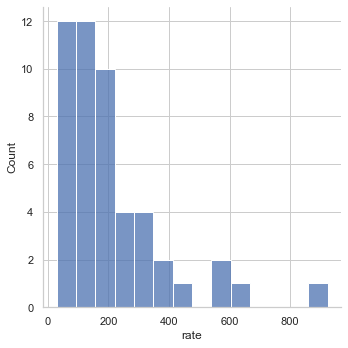

In [20]:
sns.displot(data=Measle50, x="rate_sqrt",bins=14)
sns.displot(data=Measle50, x="rate",bins=14)

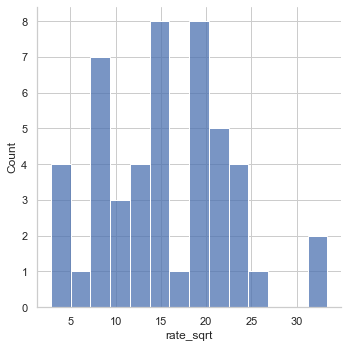

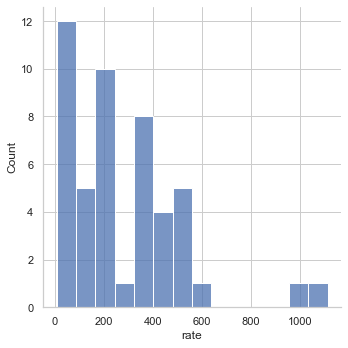

In [22]:

sns.displot(data=Measle60, x="rate_sqrt",bins=14)
sns.displot(data=Measle60, x="rate",bins=14)


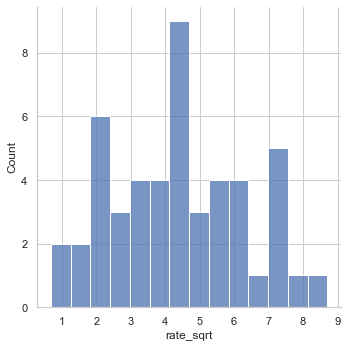

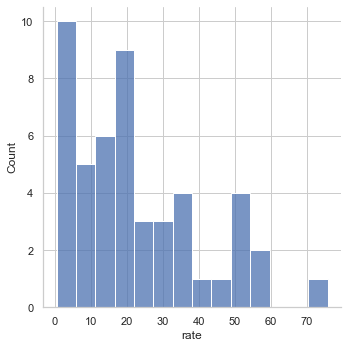

In [24]:

sns.displot(data=Measle70, x="rate_sqrt",bins=14)
sns.displot(data=Measle70, x="rate",bins=14)

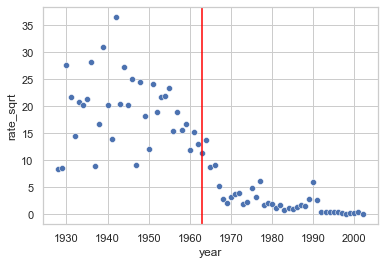

In [26]:
California["rate_sqrt"] = California["rate"].transform("sqrt")
sns.set_theme(style="whitegrid")

sns.scatterplot(x="year", y="rate_sqrt", data=California)
plt.axvline(1963, 0,1, color ='red')

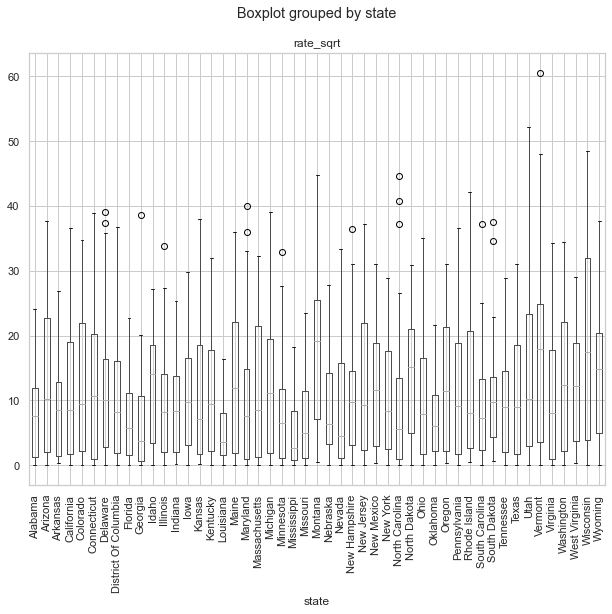

In [28]:
measle["rate_sqrt"] = measle["rate"].transform("sqrt")
GroupsRateSqrt = measle.groupby("state")
fig, ax = plt.subplots(figsize=(10,8))

measle.boxplot(column=['rate_sqrt'],by="state", ax=ax)
ax.tick_params(axis='x', rotation=90)

<AxesSubplot:xlabel='year'>

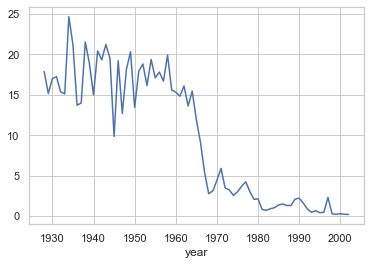

In [30]:
#average per year in USA
MeasleYearGroups.rate_sqrt.mean().plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

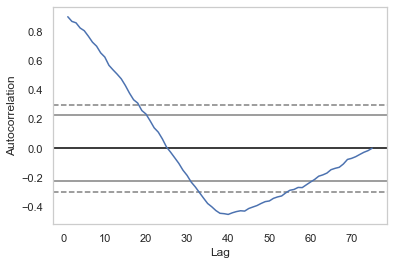

In [32]:
from pandas.plotting import autocorrelation_plot
fig,ax1=plt.subplots()
autocorrelation_plot(MeasleYearGroups.rate_sqrt.mean(), ax=ax1)

In [34]:
average_rates = MeasleYearGroups["rate_sqrt"].mean()
from scipy.stats import ttest_ind
from scipy.stats import normaltest
from scipy.stats import ttest_rel
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro

print("---variance---")
print(f"before vacc{average_rates[0:35].var()}")
print(f"after vacc{average_rates[36:71].var()}")

print('---normal distribution')
stat_shap1, p_shap1 = shapiro(average_rates[0:35])
print('stat=%.3f, p=%.3f' % (stat_shap1, p_shap1))
if p_shap1 > 0.05:
	print('before vaccine probably Gaussian')
else:
	print('before vaccine probably not Gaussian')
#looking at the values few years after 1963
stat_shap2, p_shap2 = shapiro(average_rates[36:71])
print('stat=%.3f, p=%.3f' % (stat_shap2, p_shap2))
if p_shap2 > 0.05:
	print('from 1963 after vaccine probably Gaussian')
else:
	print('from 1963 after vaccine probably not Gaussian')

stat_shap3, p_shap3 = shapiro(average_rates[40:71])
print('stat=%.3f, p=%.3f' % (stat_shap3, p_shap3))
if p_shap3 > 0.05:
	print('from 1967 after vaccine probably Gaussian')
else:
	print('from 1967 after vaccine probably not Gaussian')


print('---same distribution---')
#check if the belong to the same distribution
res, pres = ttest_ind(average_rates[0:35], average_rates[40:71])
print(res,pres)
if pres > 0.05:
	print('Probably same')
else:
	print('Probably different ')

print("---Stationary--")
stat, p, lags, obs, crit, t = adfuller(average_rates)
print('stat=%.3f, p=%.3f' % (stat, p))
print(f'lags:{lags}, obs:{obs}, crit:{crit}, t:{t}')
if p > 0.05:
	print('probably not Stationary')
else:
	print('probably Stationary')

---variance---
before vacc8.891236438063375
after vacc10.674423720692607
---normal distribution
stat=0.990, p=0.980
before vaccine probably Gaussian
stat=0.716, p=0.000
from 1963 after vaccine probably not Gaussian
stat=0.935, p=0.060
from 1967 after vaccine probably Gaussian
---same distribution---
26.137906353176916 7.310496972657466e-36
Probably different 
---Stationary--
stat=-0.332, p=0.921
lags:4, obs:70, crit:{'1%': -3.5274258688046647, '5%': -2.903810816326531, '10%': -2.5893204081632653}, t:286.0788088150623
probably not Stationary
